In [8]:
#importing necessary packages
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [9]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

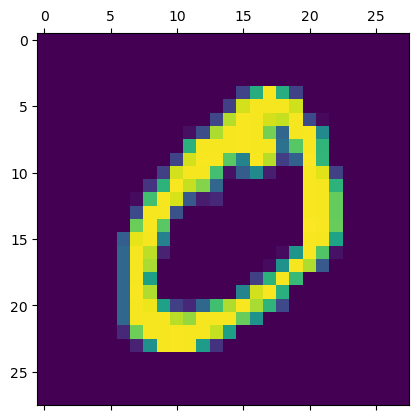

In [10]:
plt.matshow(x_train[1])

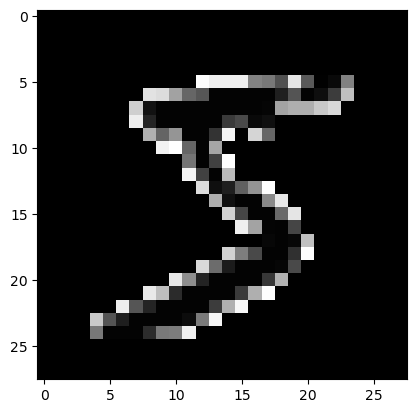

In [11]:
plt.imshow(-x_train[0], cmap="gray")

In [12]:
x_train = x_train / 255
x_test = x_test / 255


In [13]:
#define network architecture using keras
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#train model using sgd
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])


In [15]:
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6486 - accuracy: 0.8342 - val_loss: 0.3616 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.9050 - val_loss: 0.2959 - val_accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2904 - accuracy: 0.9182 - val_loss: 0.2635 - val_accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2591 - accuracy: 0.9269 - val_loss: 0.2404 - val_accuracy: 0.9329
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2354 - accuracy: 0.9341 - val_loss: 0.2201 - val_accuracy: 0.9351
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2165 - accuracy: 0.9391 - val_loss: 0.2038 - val_accuracy: 0.9417
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2007 - accuracy: 0.9436 - val_loss: 0.1922 - val_accurac

In [ ]:
#evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

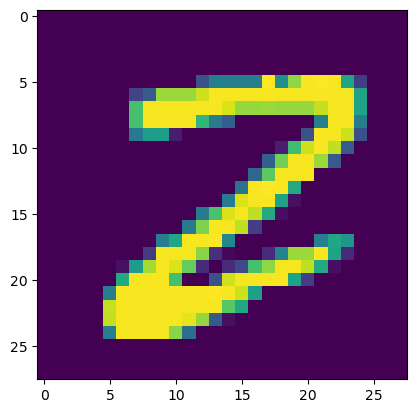

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [18]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is=%d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is=2


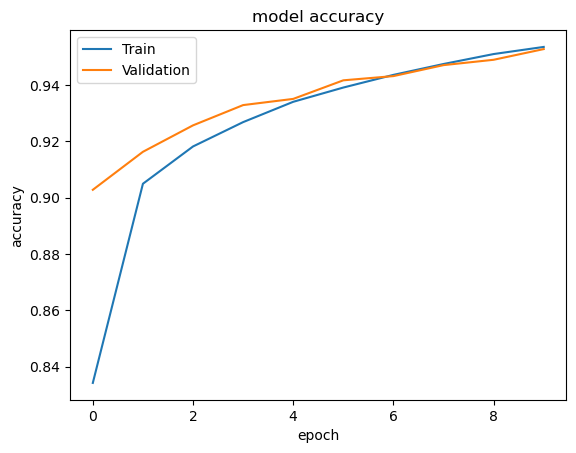

In [29]:
# history.history()
history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

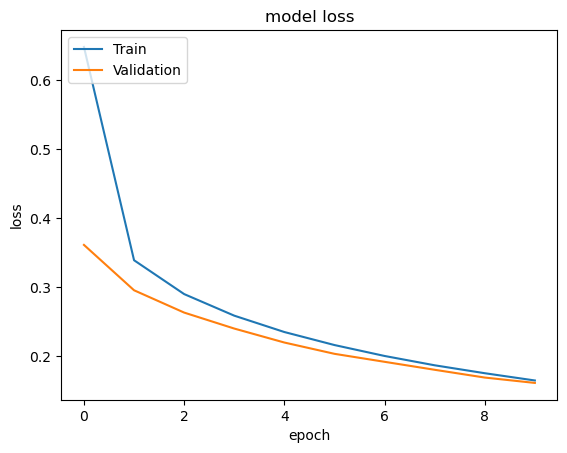

In [30]:

# history.history()

history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

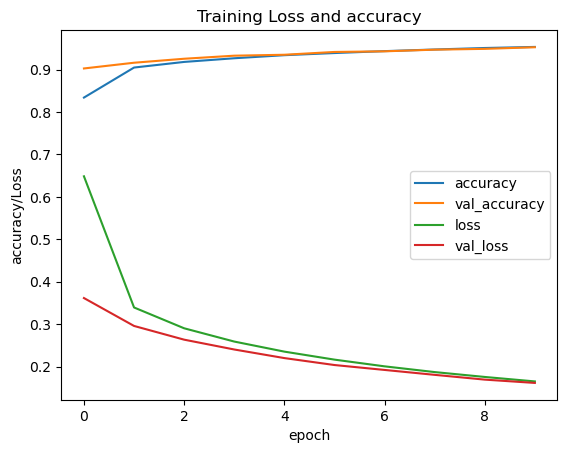

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])